## 6.4 Supervised Machine Learning: Regression

### Contents:
#### 1. Importing Libraries and Data
#### 2. Data Prep for Regression Analysis
#### 3. Regression Analysis
#### 4. Performance improvement after removing outliers

### 1. Importing Libraries and Data

In [6]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Define Path
path = r'C:\Users\ankit\Desktop\DataAnalysisCF\DataImmersion\Advanced Analytics & Dashboard Design\World Happiness Analysis'

In [42]:
# Importing Cleaned Data
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','wh_region.csv'),index_col = False)
df = df.drop(columns = 'Unnamed: 0')
df.head()

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,region
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,Europe
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,Europe
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,Europe
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,Europe
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,North America


In [89]:
df.shape

(1367, 10)

### 2. Data prep for Regression Analysis

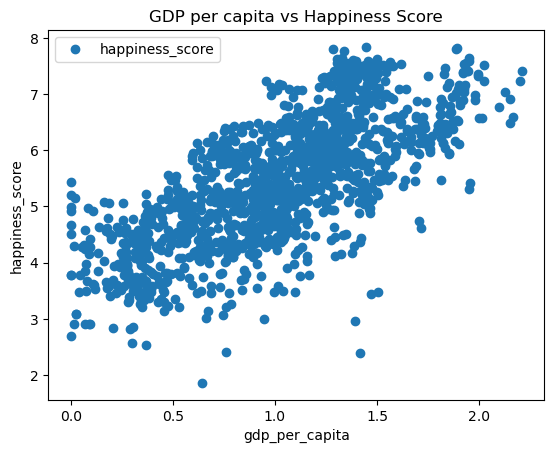

In [51]:
# Creating a scatterplot using matplotlib  to check how the chosen variables plot against each other.

df.plot(x = 'gdp_per_capita', y='happiness_score',style='o') 
plt.title('GDP per capita vs Happiness Score')  
plt.xlabel('gdp_per_capita')  
plt.ylabel('happiness_score')  
plt.show()

#### Hypothesis: If the GDP of the country increases, then Happiness_score also increase.

In [58]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['gdp_per_capita'].values.reshape(-1,1)
y = df['happiness_score'].values.reshape(-1,1)

In [60]:
X

array([[1.39651],
       [1.30232],
       [1.32548],
       ...,
       [0.67   ],
       [1.417  ],
       [0.645  ]])

In [62]:
y

array([[7.587],
       [7.561],
       [7.527],
       ...,
       [3.138],
       [2.392],
       [1.859]])

In [66]:
# Splitting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3. Regression analysis

In [69]:
# creating Regression Object
regression = LinearRegression()

In [71]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [73]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

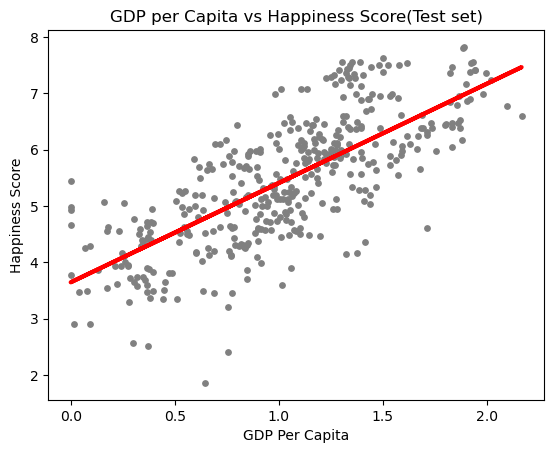

In [75]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per Capita vs Happiness Score(Test set)')
plot_test.xlabel('GDP Per Capita')
plot_test.ylabel('Happiness Score')
plot_test.show()

We can see that modarate number of data points are surrounded around the regression line. Distance of data points is not too much from the line with few exceptions.

In [77]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [79]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.76086535]]
Mean squared error:  0.5794177985201603
R2 score:  0.5575536374315843


The slope is positive indicating positive relation between X and y variable and alligning with the hypothesis.
The MSE is at 0.57 The data points are not very close to the regression line. This means the model may not be accurate for a small dataframe of 1367 observations.
R2 score of 0559 represents a moderate fit.

In [81]:
y_predicted

array([[5.86304424],
       [4.29587408],
       [5.14637204],
       [5.51379421],
       [5.51129378],
       [5.28701236],
       [6.25154928],
       [5.01254628],
       [3.87802073],
       [6.62902066],
       [3.77817967],
       [6.87378095],
       [6.08139154],
       [4.20751386],
       [4.12875035],
       [4.28703454],
       [4.3443507 ],
       [5.89778611],
       [4.94804578],
       [5.4228279 ],
       [5.21017262],
       [3.71667631],
       [6.85441143],
       [5.01606801],
       [5.49678425],
       [4.0916137 ],
       [5.22559482],
       [6.5814773 ],
       [5.52298592],
       [5.94959077],
       [5.84719645],
       [4.70398121],
       [7.069237  ],
       [5.66582732],
       [5.49502338],
       [6.00039174],
       [5.03288   ],
       [5.473893  ],
       [5.88769635],
       [4.56470539],
       [5.63073348],
       [4.29342694],
       [5.84793601],
       [6.03821512],
       [6.29259789],
       [4.98789416],
       [5.73094412],
       [6.104

In [83]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4.9480,5.863044
1,2.5230,4.295874
2,4.3400,5.146372
3,6.4850,5.513794
4,3.8960,5.511294
5,4.5740,5.287012
6,7.5040,6.251549
7,4.6030,5.012546
8,3.8560,3.878021
9,6.3770,6.629021


#### Compare how the regression fits the training set

In [93]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [95]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [97]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.76086535]]
Mean squared error:  0.6012168201588419
R2 score:  0.5081864239582867


The values are identical to the model. Positive relationship, MSE 0.60 and a moderate R2 (0.50). The model is not overfitted. This indicates that the gdp_per_capita is correlated positively with the happiness score. However, other variances in the data may determine the happiness score.

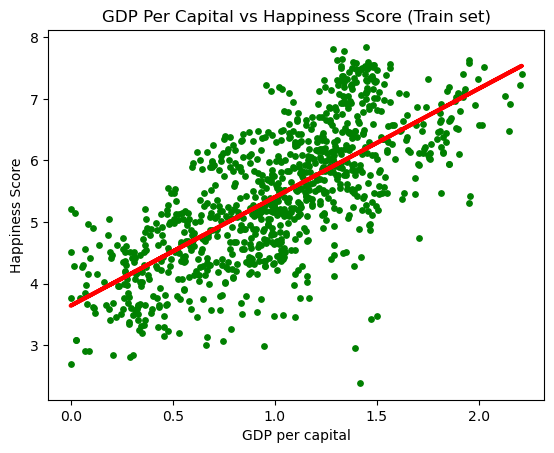

In [99]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP Per Capital vs Happiness Score (Train set)')
plot_test.xlabel('GDP per capital')
plot_test.ylabel('Happiness Score')
plot_test.show()

### 4. Performance improvement after removing outliers

In [103]:
# Clean the extreme values from the 'gdp_per_capita' variable observed during the consistency checks.
df_test= df[df['gdp_per_capita'] <= 1.926828] # Q2 (mean)+stdev*2  

In [105]:
df_test

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,region
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,Europe
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,Europe
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,Europe
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,Europe
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,North America
...,...,...,...,...,...,...,...,...,...,...
1362,Congo (Kinshasa),3.207,0.53100,0.78400,0.10500,0.37500,0.18300,0.06800,2023,Africa
1363,Zimbabwe,3.204,0.75800,0.88100,0.06900,0.36300,0.11200,0.11700,2023,Africa
1364,Sierra Leone,3.138,0.67000,0.54000,0.09200,0.37100,0.19300,0.05100,2023,Africa
1365,Lebanon,2.392,1.41700,0.47600,0.39800,0.12300,0.06100,0.02700,2023,Asia


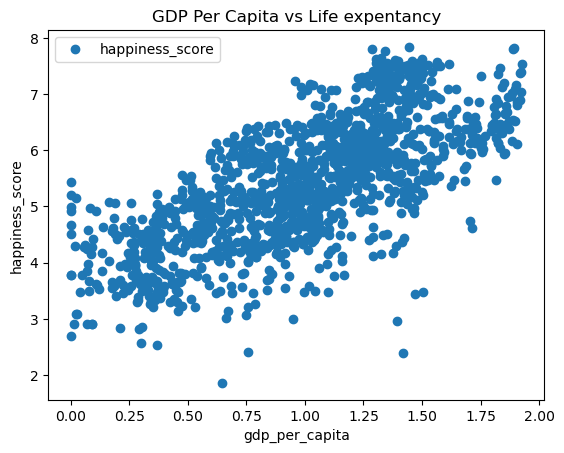

In [107]:
# See how the scatterplot looks without outliers.
df_test.plot(x = 'gdp_per_capita', y='happiness_score', style='o')  
plt.title('GDP Per Capita vs Life expentancy')  
plt.xlabel('gdp_per_capita')  
plt.ylabel('happiness_score')  
plt.show()

In [109]:
# Reshape again.
X_2 = df_test['gdp_per_capita'].values.reshape(-1,1)
y_2 = df_test['happiness_score'].values.reshape(-1,1)

In [111]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)


In [113]:
# Run and fit the regression.
regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [115]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [117]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [119]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.83527378]]
Mean squared error:  0.5903764358232968
R2 score:  0.4878178763401797


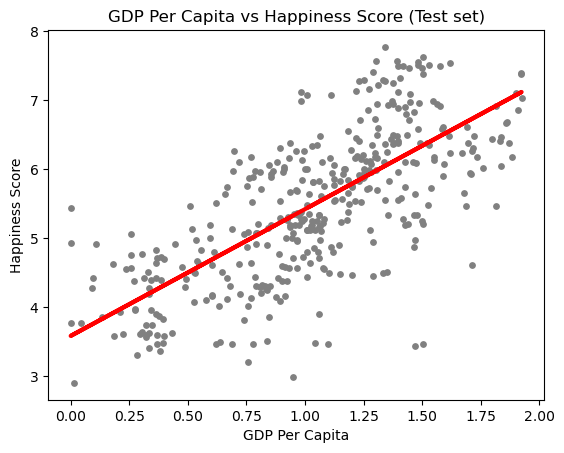

In [121]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('GDP Per Capita vs Happiness Score (Test set)')
plot_test.xlabel('GDP Per Capita')
plot_test.ylabel('Happiness Score')
plot_test.show()

In [123]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,5.1976,5.306732
1,3.6030,4.261995
2,5.9190,5.841835
3,3.4950,4.754563
4,6.4410,6.090643
5,3.8960,5.531325
6,3.5870,3.926855
7,5.6400,4.791269
8,4.7990,5.525378
9,5.8480,5.760257


After removing outliers, the summary statistics shows the same positive correlation between selected variables (Slope=1.83); MSE=0.59 means that the datapoints still scattered far from the regression line; r2 coefficient (0.48) indicates a moderate fit. Thus, this model is considered inaccurate for this data set.